#**<center>Classifying Human Cells as Malignent or Benign using Support Vector Machine</center>**

<center>In this notebook, you will use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

</center>

###**Importing Library**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Downloading The Dataset from IBM Object Storage**

In [34]:
!wget -O CellSamples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-07-12 07:51:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘CellSamples.csv’

CellSamples.csv     100%[===================>]  20.19K  --.-KB/s    in 0.02s   

2020-07-12 07:51:40 (1.25 MB/s) - ‘CellSamples.csv’ saved [20675/20675]



###**Reading and Exploring Data**
The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [35]:
df = pd.read_csv('CellSamples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

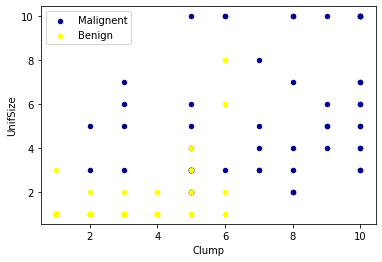

In [37]:
ax = df[df['Class'] == 4][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='Malignent')
df[df['Class'] == 2][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='Benign', ax=ax)
plt.show()

###**Data Pre-Processing**
BareNuc column includes some values that are not numerical. We can drop those rows

In [38]:
df= df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

In [39]:
X_data = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
y_data = df['Class'].values

###**Splitting Data into Train & Test Set**

In [40]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size=0.2, random_state=4)
print("Size of the Train Set: ", train_X.shape[0])
print("Size of the Test Set: ", test_X.shape[0])

Size of the Train Set:  546
Size of the Test Set:  137


###**Training the Model using SVM**

In [41]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score

predicted_y = classifier.predict(test_X)
cm = confusion_matrix(test_y, predicted_y, labels=[2,4])
print("Accuracy: ", accuracy_score(test_y, predicted_y))
print("Jaccard Score: ", jaccard_score(test_y, predicted_y, pos_label=2))

Accuracy:  0.9635036496350365
Jaccard Score:  0.9444444444444444


In [43]:
from itertools import product

def plot_confusion(cm):
  classes=['Benign(2)', 'Malignent(4)']

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  for x_axis, y_axis in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(y_axis, x_axis, cm[x_axis, y_axis], horizontalalignment='center', color='white' if cm[x_axis, y_axis] > cm.max()/2 else 'black')

  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.show()

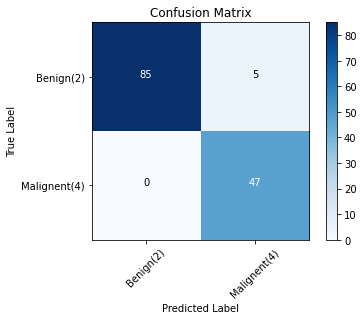

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [44]:
plot_confusion(cm)
print(classification_report(test_y, predicted_y))

###**Let's Try "Linear" as Kernel Function**

We'll try to train our model this time with "Linear" as Kerner Function as see if Our Accuracy Improves

In [45]:
new_classifier = SVC(kernel='linear')
new_classifier.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
new_pred_y = new_classifier.predict(test_X)

print("Accuracy: ", accuracy_score(test_y, new_pred_y))
print("Jaccard Index: ", jaccard_score(test_y, new_pred_y, pos_label=2))
cm = confusion_matrix(test_y, new_pred_y)

Accuracy:  0.9635036496350365
Jaccard Index:  0.9444444444444444


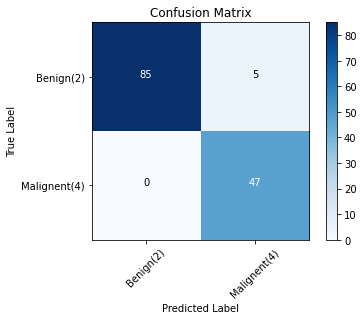

              precision    recall  f1-score   support

           2       0.94      1.00      0.97        85
           4       1.00      0.90      0.95        52

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.97      0.96      0.96       137



In [47]:
plot_confusion(cm)
print(classification_report(new_pred_y, test_y))

##**<center>Thank You for Your Patience**</center>